In [82]:
#importing required packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn import metrics

warnings.filterwarnings('ignore')

In [83]:
#Read Dataset
credit_data = pd.read_excel(r"C:\Users\samue\OneDrive\Documents\Bobby\Datasets\credit_scoring.xlsx")

In [84]:
credit_data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


### Exploration phase

In [85]:
#Let's see what columns we have
credit_data.columns

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [86]:
#check for consistent data types
credit_data.dtypes

TARGET               int64
ID                   int64
DerogCnt             int64
CollectCnt           int64
BanruptcyInd         int64
InqCnt06             int64
InqTimeLast        float64
InqFinanceCnt24      int64
TLTimeFirst          int64
TLTimeLast           int64
TLCnt03              int64
TLCnt12              int64
TLCnt24              int64
TLCnt              float64
TLSum              float64
TLMaxSum           float64
TLSatCnt           float64
TLDel60Cnt           int64
TLBadCnt24           int64
TL75UtilCnt        float64
TL50UtilCnt        float64
TLBalHCPct         float64
TLSatPct           float64
TLDel3060Cnt24       int64
TLDel90Cnt24         int64
TLDel60CntAll        int64
TLOpenPct          float64
TLBadDerogCnt        int64
TLDel60Cnt24         int64
TLOpen24Pct        float64
dtype: object

In [87]:
#Examine our dataset's statistical properties
stats_properties = credit_data.describe().T
pd.DataFrame(data=stats_properties)
stats_properties

,count,mean,std,min,25%,50%,75%,max
TARGET,3000.0,0.166667,0.372740,0.0,0.0000,0.00000,0.00000,1.0000
ID,3000.0,62922.683667,37203.691912,66.0,30376.5000,62872.50000,96156.50000,126503.0000
DerogCnt,3000.0,1.430000,2.731469,0.0,0.0000,0.00000,2.00000,51.0000
CollectCnt,3000.0,0.857000,2.161352,0.0,0.0000,0.00000,1.00000,50.0000
BanruptcyInd,3000.0,0.153333,0.360369,0.0,0.0000,0.00000,0.00000,1.0000
InqCnt06,3000.0,3.108333,3.479171,0.0,1.0000,2.00000,4.00000,40.0000
InqTimeLast,2812.0,3.108108,4.637831,0.0,1.0000,1.00000,3.00000,24.0000
InqFinanceCnt24,3000.0,3.555000,4.477536,0.0,1.0000,2.00000,5.00000,48.0000
TLTimeFirst,3000.0,170.113667,92.813700,6.0,106.0000,151.00000,227.00000,933.0000
TLTimeLast,3000.0,11.873667,16.321412,0.0,4.0000,7.00000,13.00000,342.0000


In [88]:
#check dataset for duplicates
credit_data.duplicated().sum()

0

#### No duplicates. Great! Let's see if we have missing data

In [89]:
credit_data.isnull().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

We can use the mean inputation method for our missing values. While this is not the best approach because further exploration could lead us to more information on whether our data is missing completely at random or not at random, thereby allowing us implement the best imputation method that mirrors the exact data generating process for our dataset

In [90]:
#before we make changes to our dataset, let's make a copy so we preserve the original
credit_data_X = credit_data.copy()

#Mean imputation
#credit_data_X.fillna(credit_data_X.mean(), inplace=True)


In [91]:
credit_data_X.isnull().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64


Let's try to impute missing values using a regression function. We'll specify the model accuracy results for both methods in the Appendix


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(credit_data_X)
credit_data_X = pd.DataFrame(imp_mean.transform(credit_data_X))
credit_data_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [94]:
credit_data_X.columns = credit_data.columns
credit_data_X.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,582.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,662.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,805.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,1175.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,1373.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [95]:
#check status of missing data
credit_data_X.isnull().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [96]:
#let's see how many features we have in our dataset
credit_data.shape

(3000, 30)

We have 28 features, a unique identifier and a target variable (A column that tells us what the outcome of each observation was; either negative, denoted by `1` or positive, denoted by `0`)

We may not require all 28 features to help our model understand the true data generating process of our dataset but we sure would like to have as little features as possible with all the information required to make our model close to perfection, which means reducing the noise in our data by removing unnecessary features that could lead to overfitting. Let's see how we can use PCA to achieve that.

#### Principal Component Analysis

Principal Component Analysis (PCA) is a technique used in Python and machine learning to reduce the dimensionality of high-dimensional data while preserving the most important information.

In [97]:

#Drop ID column
credit_data_X.drop(["ID"], axis=1, inplace=True)
credit_data_X.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,0.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,0.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,0.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,0.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,0.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [98]:
#We should set our target variable aside so it's not affected by the dimensionality reduction exercise.

y = credit_data_X['TARGET']
X = credit_data_X.drop(['TARGET'], axis=1)

In [99]:
X.head()
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: TARGET, dtype: float64

In [100]:
#Standardize our dataset features into a unit scale because the PCA is affected by variance in scale
X_scaled = StandardScaler().fit_transform(X)

In [101]:
#Examine scaled data
X_scaled

array([[ 0.57487821,  0.99167442, -0.42556123, ...,  1.05324168,
         1.62345171, -1.17460645],
       [ 4.96885178,  3.76817768, -0.42556123, ...,  4.30524222,
        -0.59160463,  0.9086946 ],
       [-0.52361518, -0.39657722, -0.42556123, ..., -0.16625853,
        -0.03784055, -0.07816511],
       ...,
       [-0.15745072,  0.06617333, -0.42556123, ..., -0.16625853,
        -0.59160463,  0.38786934],
       [ 0.94104267,  1.45442496, -0.42556123, ...,  1.05324168,
        -0.03784055,  0.9086946 ],
       [ 0.20871374,  0.06617333,  2.34983811, ...,  0.64674161,
         0.51592354, -1.17460645]])

In [102]:
#implementing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
principal_components = pca.fit_transform(X_scaled)

In [103]:
#Examine the shape of our adjusted dataset
principal_components.shape

(3000, 15)

In [104]:
pca.explained_variance_

array([6.70797689, 4.66721819, 3.03044352, 1.82226974, 1.44430614,
       1.35858336, 1.30096713, 1.20346504, 0.85970237, 0.78909501,
       0.77027815, 0.71239566, 0.59151889, 0.5465346 , 0.40012348])

In [105]:
pca_credit_data = pd.DataFrame(principal_components)

In [106]:
pca_credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.993942,1.600072,-0.835125,1.070249,-1.051091,-1.415432,-0.554525,-0.898597,-0.096734,-0.215882,0.125024,-0.997599,0.519913,-0.602618,-0.158972
1,3.565023,-0.874125,3.616033,6.433232,0.792510,0.100718,0.029178,-0.312001,0.629070,-0.313707,-0.782511,-0.941433,-0.443183,0.402387,0.417123
2,-2.164046,0.519491,-1.495548,0.031073,0.057018,2.013624,-0.464023,0.811216,-0.383390,-0.261541,-0.120032,1.645456,0.519214,0.485416,0.032693
3,1.814855,0.340256,3.672235,2.748505,0.642747,-0.824504,-0.553260,-1.049188,-0.466082,0.146844,-0.205773,-0.308331,-0.653107,0.348070,0.319261
4,3.715854,-0.237402,0.591708,-0.091119,-1.078516,-3.172910,-0.105274,0.258747,0.545781,-0.676942,2.100155,-0.884699,1.026589,-0.665777,0.306074


In [107]:
#Map target variable to principal components
pca_credit_data['Target'] = y

pca_credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,2.993942,1.600072,-0.835125,1.070249,-1.051091,-1.415432,-0.554525,-0.898597,-0.096734,-0.215882,0.125024,-0.997599,0.519913,-0.602618,-0.158972,1.0
1,3.565023,-0.874125,3.616033,6.433232,0.792510,0.100718,0.029178,-0.312001,0.629070,-0.313707,-0.782511,-0.941433,-0.443183,0.402387,0.417123,1.0
2,-2.164046,0.519491,-1.495548,0.031073,0.057018,2.013624,-0.464023,0.811216,-0.383390,-0.261541,-0.120032,1.645456,0.519214,0.485416,0.032693,1.0
3,1.814855,0.340256,3.672235,2.748505,0.642747,-0.824504,-0.553260,-1.049188,-0.466082,0.146844,-0.205773,-0.308331,-0.653107,0.348070,0.319261,1.0
4,3.715854,-0.237402,0.591708,-0.091119,-1.078516,-3.172910,-0.105274,0.258747,0.545781,-0.676942,2.100155,-0.884699,1.026589,-0.665777,0.306074,1.0


#### Now let's teach our model how this data was generated

We'll be using Logistic Regression, a regression model whose output can also be used as a threshold to classify binary outcomes like we are doing now.

In [108]:
#Split principal components into training and test data
y = pca_credit_data['Target']
X = pca_credit_data.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
X_train.shape

(2400, 15)

In [110]:
y.shape

(3000,)

In [111]:
#initialize our Risk Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Check our Risk Model performance

In [112]:
print(confusion_matrix(y_test, y_pred))

[[485  13]
 [ 87  15]]


In [113]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [114]:
#Use our Risk Model to predict outcomes for our test data
predictions = classifier.predict_proba(X_test)
predictions

array([[0.03809819, 0.96190181],
       [0.91483058, 0.08516942],
       [0.794807  , 0.205193  ],
       ...,
       [0.96685491, 0.03314509],
       [0.40975724, 0.59024276],
       [0.90479483, 0.09520517]])

We can see an `83%` accuracy from our model. This is a fair outcome but we always want our model to be better, especially in situations where the margin for prediction error is very low. You neither want to grant a bad loan nor reject a good loan application.

Let's try splitting our data with `Cross Validation` as a first step to model improvement.

In [115]:
from numpy import std, mean
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier2 = LogisticRegression()
# evaluate model
scores = cross_val_score(classifier2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(f'Accuracy: {round(mean(scores),2)}')

Accuracy: 0.84


A bit of improvement in our model accuracy.

In [116]:

classifier2.fit(X_train, y_train)
y_pred_2 = classifier.predict(X_test)
predictions_2 = classifier2.predict_proba(X_test)
predictions_2

array([[0.03809819, 0.96190181],
       [0.91483058, 0.08516942],
       [0.794807  , 0.205193  ],
       ...,
       [0.96685491, 0.03314509],
       [0.40975724, 0.59024276],
       [0.90479483, 0.09520517]])

In [117]:
print(confusion_matrix(y_test, y_pred_2))

[[485  13]
 [ 87  15]]


Let's Visualize how accurate our model is in predicting positive and negative loan outcomes

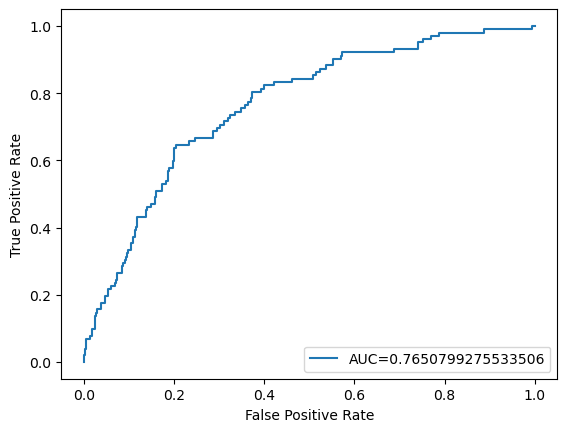

In [118]:
#define metrics
predictions = classifier.predict_proba(X_test)[::,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)

#create ROC curve
plt.plot(false_positive_rate,true_positive_rate,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

We may not have a great model but it's fair. We should definitely improve this model.

Next steps would be to

1. Examine our data closely to see how we can generate new features that could help our model learn the patterns in our data better.
2. Try out a different learning algorithm (A tree based or even a Neural Network to see how it improves the accuracy of our predictions.)

#### Appendix

Model Accuracy scores
1. With mean imputation for missing data = `82.5%`
2. Imputing missing data with regression function = `83.3%`
